## Import Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df2 = pd.read_csv('Data_grouped_by_date.csv', parse_dates=['date'], infer_datetime_format=True)
df2 = df2.set_index(['date'])

# Decomposition
- Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.
- Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.
- A stationary time series is one whose properties do not depend on the time at which the series is observed. From decomposition it can be seen that our target variables % Iron Concentrate & % Silica Concentrate are stationary.

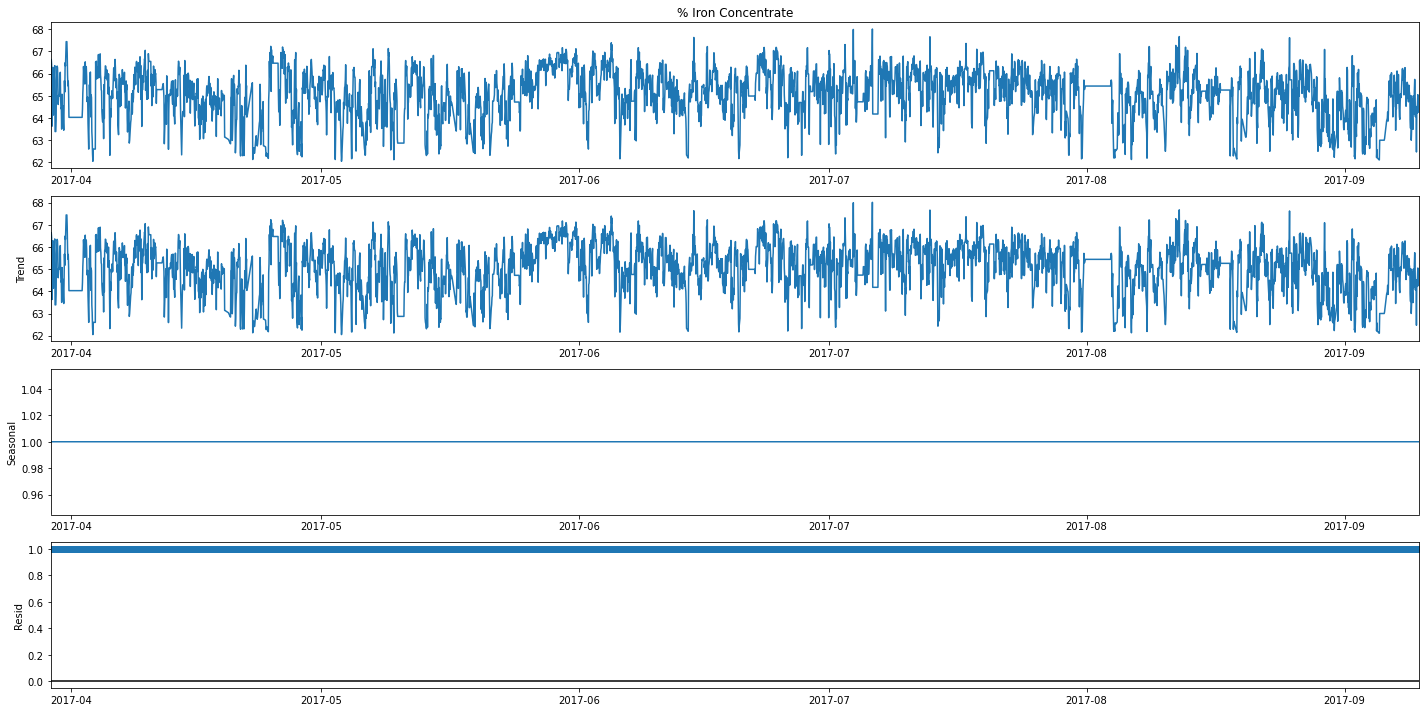

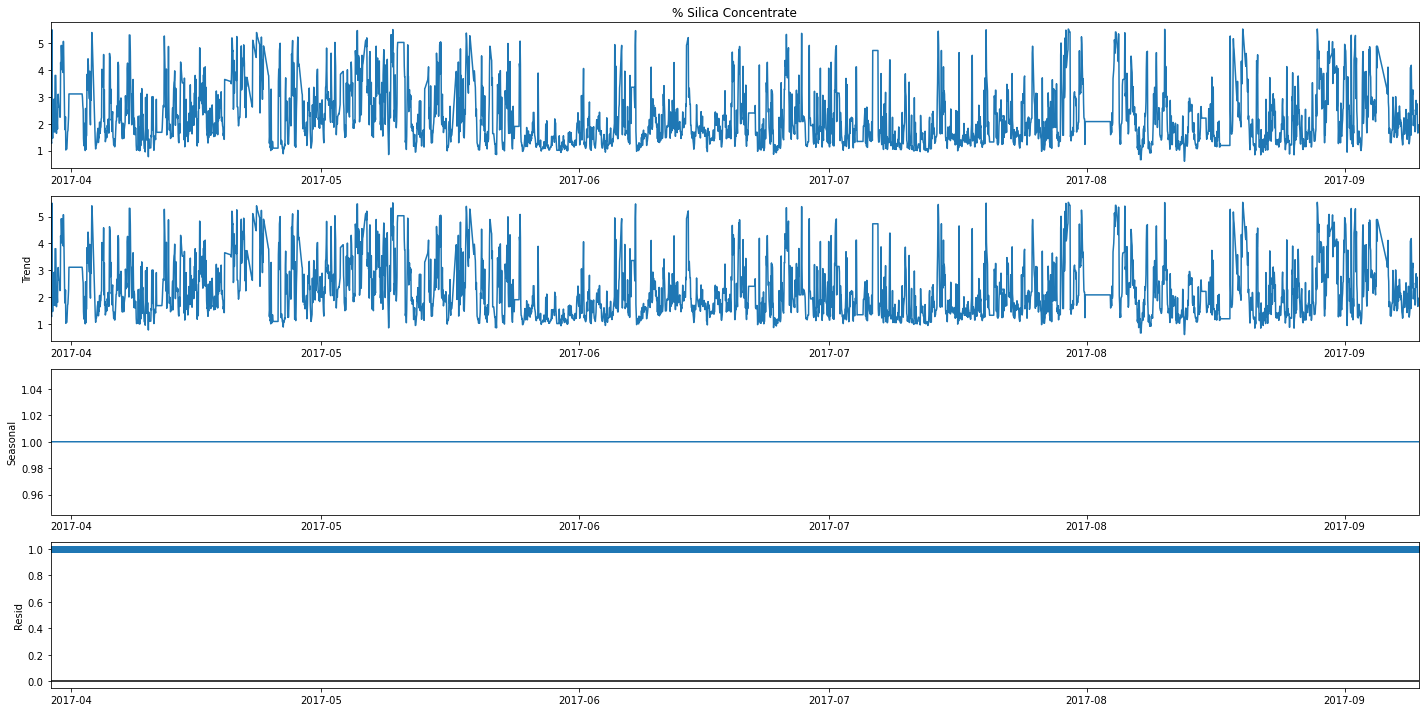

In [23]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
pyplot.rcParams["figure.figsize"] = (20,10)

result = seasonal_decompose(df2['% Iron Concentrate'], model='multiplicative', period=1)
result.plot()
pyplot.show()

result = seasonal_decompose(df2['% Silica Concentrate'], model='multiplicative', period=1)
result.plot()
pyplot.show()

# Moving Average (MA)

- Moving average smoothing is a naive and effective technique in time series forecasting.

**MA as Data Preparation**

date
2017-03-29 12:00:00         NaN
2017-03-29 13:00:00         NaN
2017-03-29 14:00:00    1.373333
2017-03-29 15:00:00    1.343333
2017-03-29 16:00:00    2.700000
2017-03-29 17:00:00    2.803333
2017-03-29 18:00:00    2.866667
2017-03-29 19:00:00    1.596667
2017-03-29 20:00:00    1.653333
2017-03-29 21:00:00    1.736667
Name: % Silica Concentrate, dtype: float64


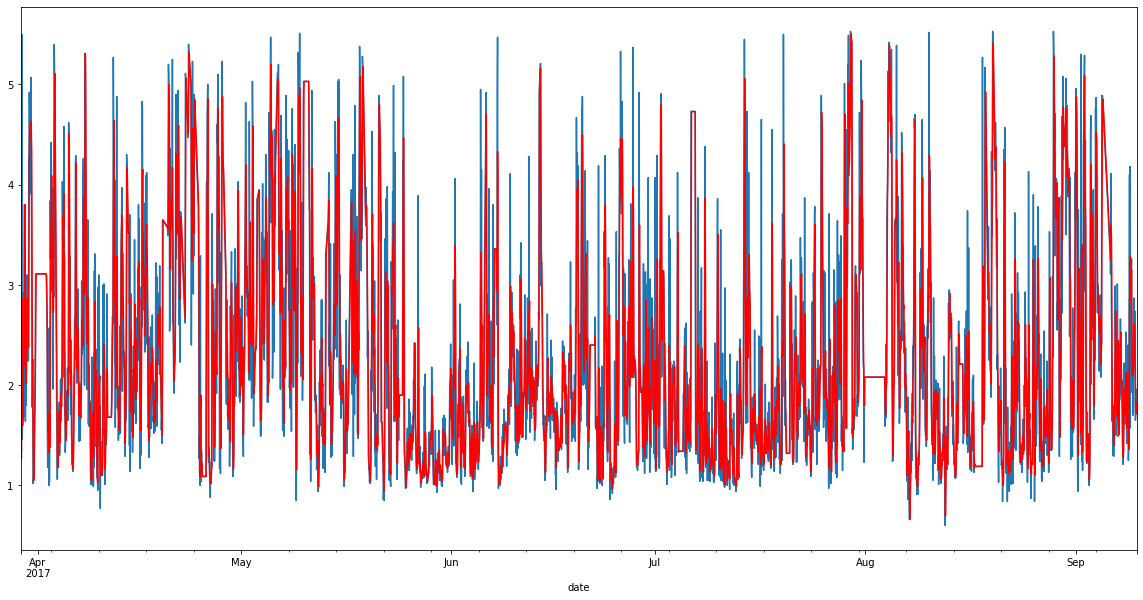

In [22]:
from pandas import read_csv
from matplotlib import pyplot
series = df2['% Silica Concentrate']
# Tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()